In [187]:
## Lets see the data more closely

In [188]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [189]:
# Reading Cleaned Data
data = pd.read_csv('sessionize_data/cleaned_data.csv')
data.head(10)

,session_id,unix_timestamp,cities,user_id,joining_date,country
0,D258NVMV202LS,1442640552,"San Jose CA, Montreal QC",5749,2015-04-02,FR
1,TDG10UKG7I4LR,1432110137,New York NY,10716,2015-03-30,DE
2,OH4ZDIGN9BLQS,1437049311,"Montreal QC, Quebec QC",2941,2015-03-16,NaN
3,CWHIAYKQ7RA28,1432215908,Chicago IL,2164,2015-03-27,FR
4,GI8GZJAWAC80P,1443556226,"Toronto ON, Houston TX",10493,2015-03-31,US
5,NRMA4TM621WRD,1426839878,New York NY,326,2015-03-14,IT
6,ZD0XZK1U43LK6,1441269971,Los Angeles CA,4417,2015-04-02,IT
7,5FWYK13BT295Y,1439889752,"San Diego CA, Santa Ana CA",8056,2015-03-19,FR
8,FHDJFT27R46XS,1431161158,New York NY,7146,2015-03-21,NaN
9,PWERIG07P4511,1442414804,"Toronto ON, Saint Catharines-Niagara ON",9705,2015-03-07,DE


In [190]:
## Note to self : Find other insights, can be found on Kaggle probably from similar data sets.

In [191]:
print(data['country'].value_counts(dropna= False))

country
US     3772
UK     3754
DE     3741
NaN    2769
FR     2341
IT     1843
ES     1802
Name: count, dtype: int64


In [192]:
data['cities'].value_counts()

cities
New York NY                                                                          2296
Toronto ON                                                                           1216
Los Angeles CA                                                                       1046
Montreal QC                                                                           913
Chicago IL                                                                            746
                                                                                     ... 
Houston TX, Corpus Christi TX, San Antonio TX, Austin TX, Fort Worth TX, Plano TX       1
Detroit MI, London ON, Saint Catharines-Niagara ON, Oshawa ON                           1
Chicago IL, Toronto ON, Vancouver BC                                                    1
New York NY, Jersey City NJ, Newark NJ, WASHINGTON DC, Baltimore MD                     1
Dallas TX, Oklahoma City OK, Plano TX                                                   1
Nam

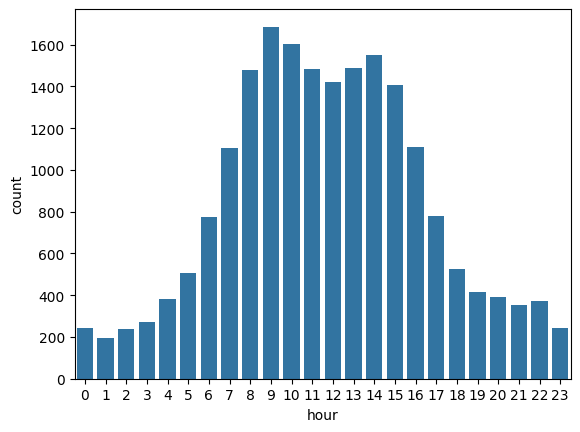

In [193]:
## Lets see the ditribution of searches with hour of the day
# Convert unix_timestamp to datetime in seconds
data['unix_timestamp'] = pd.to_datetime(data['unix_timestamp'],unit='s')
#Now exteract hour from the timestamp
data['hour'] = data['unix_timestamp'].apply(lambda x: x.hour)
#Lets plot the distribution
sns.countplot(x='hour',data=data)
plt.show()

In [194]:
# Looks like most countries are Eurpoean countries

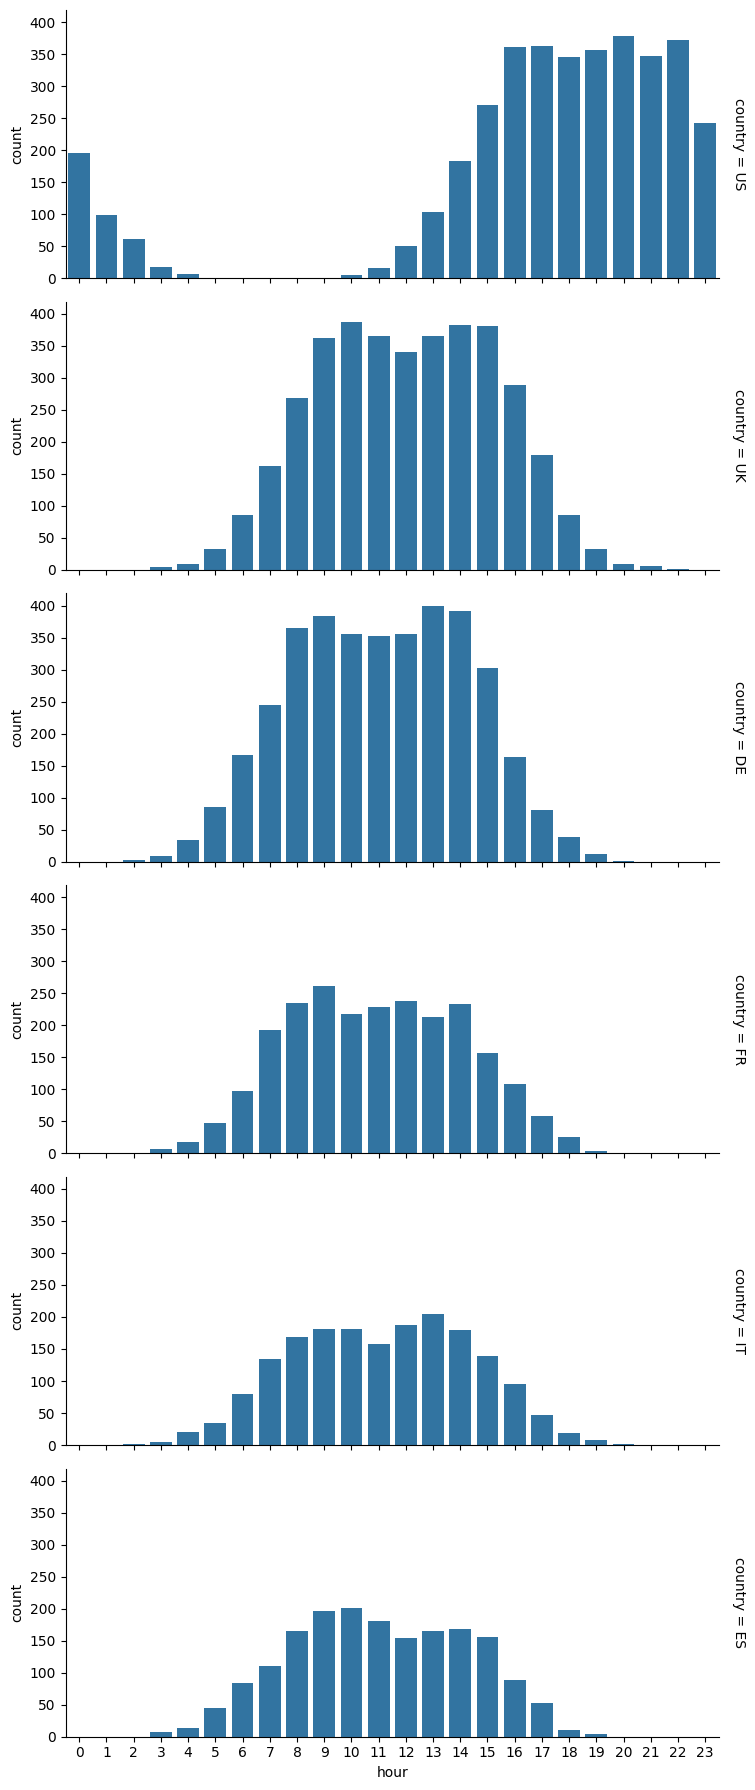

In [195]:
# Lets the distribution of hour by countries
g = sns.FacetGrid(data=data,row='country',row_order=data.country.value_counts().index, margin_titles=True)
g.map(sns.countplot,'hour', order=range(0,24))
g.fig.set_figwidth(10)
plt.show()

In [196]:
## Probably the missing Country is Iran

## Now we want to segregate users in High and Low Intetion users, the Idea being if the user has high intent to travel they will be looking for nearby cities
## but if they dont have high intent they will be looking for cities far away from each other, like London and Paris and San Francisco in same search sessions

In [197]:
data[['session_id','cities']].head(10)
cities = data['cities'].str.split(',')

In [198]:
cities

0             [San Jose CA,  Montreal QC]
1                           [New York NY]
2               [Montreal QC,  Quebec QC]
3                            [Chicago IL]
4               [Toronto ON,  Houston TX]
                       ...               
20017                        [Phoenix AZ]
20018                         [OTTAWA ON]
20019                   [Indianapolis IN]
20020                        [Chicago IL]
20021    [Los Angeles CA,  Long Beach CA]
Name: cities, Length: 20022, dtype: object

In [199]:
cities = np.hstack(cities)

In [200]:
cities

array(['San Jose CA', ' Montreal QC', 'New York NY', ..., 'Chicago IL',
       'Los Angeles CA', ' Long Beach CA'], dtype='<U28')

In [201]:
#Then, for each session_id let's get count of cities searched together
count_per_session = data['cities'].apply(lambda x: len(x.split(',')))
#Let's create a vector where each session is repeated as many times as count_per_session
session_id = np.repeat(data['session_id'], count_per_session)
#Put them into a data.frame
data_similarity = pd.DataFrame({'cities':cities, 'session_id':session_id})
    
#Looks good
print(data_similarity.head())

         cities     session_id
0   San Jose CA  D258NVMV202LS
0   Montreal QC  D258NVMV202LS
1   New York NY  TDG10UKG7I4LR
2   Montreal QC  OH4ZDIGN9BLQS
2     Quebec QC  OH4ZDIGN9BLQS


In [202]:
data_similarity['cities'] = data_similarity['cities'].str.lstrip()

In [183]:
#Creating A Vector Space of Cities
data_similarity['binary_value'] = 1
data_similarity = data_similarity.pivot(index='session_id', columns='cities').fillna(0)

print(data_similarity.shape)

(20022, 87)


In [184]:
data_similarity

binary_value                                                   \
cities          Anaheim CA Arlington TX Atlanta GA Austin TX Bakersfield CA   
session_id                                                                    
005DKBSO9FEZL          0.0          0.0        0.0       0.0            0.0   
006EM84U68V9I          0.0          0.0        0.0       0.0            0.0   
009CAJV5IDV7Q          0.0          0.0        0.0       0.0            0.0   
00AR2ULVTS3JY          0.0          0.0        0.0       0.0            0.0   
00B1MRZFC6KZM          0.0          0.0        0.0       0.0            0.0   
...                    ...          ...        ...       ...            ...   
ZZTH5MZ1DY4PX          0.0          0.0        0.0       0.0            0.0   
ZZWVLMEY5H5DM          0.0          0.0        0.0       0.0            0.0   
ZZXKUGEYHZXOJ          0.0          0.0        0.0       0.0            0.0   
ZZYCEP57WDPTC          0.0          0.0        0.0       0.0            0.0   
ZZZ3P5GW1PJWL          0.0          0.0        0.0       0.0            0.0   

                                                                          ...  \
cities        Baltimore MD Birmingham AL Boston MA Buffalo NY Calgary AB  ...   
session_id                                                                ...   
005DKBSO9FEZL          1.0           0.0       0.0        0.0        0.0  ...   
006EM84U68V9I          0.0           0.0       0.0        0.0        0.0  ...   
009CAJV5IDV7Q          0.0           0.0       0.0        0.0        1.0  ...   
00AR2ULVTS3JY          0.0           0.0       0.0        0.0        0.0  ...   
00B1MRZFC6KZM          0.0           0.0       0.0        0.0        0.0  ...   
...                    ...           ...       ...        ...        ...  ...   
ZZTH5MZ1DY4PX          0.0           0.0       0.0        0.0        0.0  ...   
ZZWVLMEY5H5DM          0.0           0.0       0.0        0.0        0.0  ...   
ZZXKUGEYHZXOJ          0.0           0.0       0.0        0.0        0.0  ...   
ZZYCEP57WDPTC          0.0           0.0       0.0        0.0        0.0  ...   
ZZZ3P5GW1PJWL          0.0           0.0       0.0        0.0        0.0  ...   

                                                                    \
cities        Toledo OH Toronto ON Tucson AZ Tulsa OK Vancouver BC   
session_id                                                           
005DKBSO9FEZL       0.0        0.0       0.0      0.0          0.0   
006EM84U68V9I       0.0        0.0       0.0      0.0          0.0   
009CAJV5IDV7Q       0.0        0.0       0.0      0.0          0.0   
00AR2ULVTS3JY       0.0        0.0       0.0      0.0          0.0   
00B1MRZFC6KZM       0.0        0.0       0.0      0.0          0.0   
...                 ...        ...       ...      ...          ...   
ZZTH5MZ1DY4PX       0.0        0.0       0.0      0.0          0.0   
ZZWVLMEY5H5DM       0.0        0.0       0.0      0.0          0.0   
ZZXKUGEYHZXOJ       0.0        0.0       0.0      0.0          0.0   
ZZYCEP57WDPTC       0.0        0.0       0.0      0.0          1.0   
ZZZ3P5GW1PJWL       0.0        0.0       0.0      0.0          0.0   

                                                                      \
cities        Victoria BC Virginia Beach VA WASHINGTON DC Wichita KS   
session_id                                                             
005DKBSO9FEZL         0.0               0.0           0.0        0.0   
006EM84U68V9I         0.0               0.0           0.0        0.0   
009CAJV5IDV7Q         0.0               0.0           0.0        0.0   
00AR2ULVTS3JY         0.0               0.0           0.0        0.0   
00B1MRZFC6KZM         0.0               0.0           0.0        0.0   
...                   ...               ...           ...        ...   
ZZTH5MZ1DY4PX         0.0               0.0           0.0        0.0   
ZZWVLMEY5H5DM         0.0               0.0           0.0        0.0   

In [185]:
from sklearn import metrics

#As similarity function, let's take the cosine similarity
city_cosine = pd.DataFrame(metrics.pairwise.cosine_similarity(data_similarity.T))
#add index and column names 
city_cosine.columns = data_similarity.columns.get_level_values(1)
city_cosine.index = city_cosine.columns
  
#Let's now find for each row/city, the column with the highest value (after excluding that city itself)
closest_city = pd.DataFrame({"most_similar_city":[None]*len(city_cosine)})
#Let's have cities as index
closest_city.index = city_cosine.index
  
#For each row, we pick the highest score
i = 0
while i < len(closest_city):
      #for each city, this gives a list of cosine similarity with the other cities
      tmp_cosine = city_cosine.drop(city_cosine.columns[i], axis=1).iloc[i]
      #and now we pick the city with the max
      closest_city.most_similar_city.iloc[i] = tmp_cosine.idxmax()
      i += 1
  
#They tend to make sense
print(closest_city.head(10))


                          most_similar_city
cities                                     
Anaheim CA                     Santa Ana CA
Arlington TX                  Fort Worth TX
Atlanta GA                    Birmingham AL
Austin TX                    San Antonio TX
Bakersfield CA                    Fresno CA
Baltimore MD                  WASHINGTON DC
Birmingham AL                    Atlanta GA
Boston MA                    Jersey City NJ
Buffalo NY      Saint Catharines-Niagara ON
Calgary AB                      Edmonton AB


## We use cosine similarity from above as a proxy for distance. The assumption here is that cities that are geographically close to each other are also more likely to be searched together because they are part of the same trip. Therefore they will have higher cosine similarity.

## Another way to say this is: let’s say someone searches for San Francisco. If they are actually planning for a vacation, they will most likely also search for, say, Los Angeles. On the other hand, if they are just dreaming about a vacation, they will search for some other random cities (NY, Rome, Paris, etc.). But dreamer co-searches will be very diverse, i.e. one will search for SF and NY, one for SF and Rome, etc. On the other hand, most of trip planners will search for exactly LA and SF. Therefore, LA should have way higher cosine similarity with SF than those other cities.


/var/folders/q2/zdtl3_d10073dllzr0f3b1_00000gn/T/ipykernel_4059/3238778576.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score)


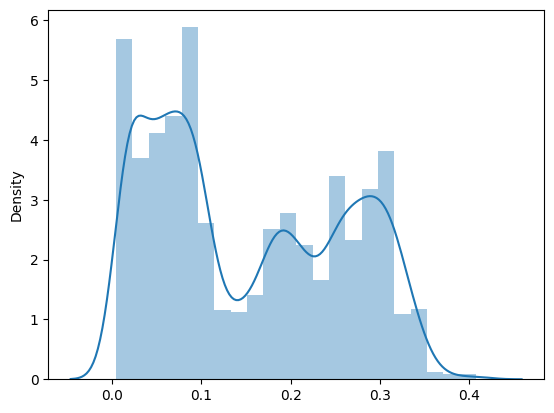

In [186]:
import itertools

#Only keep sessions with more than one search
data_intent = data['cities'][count_per_session>1].reset_index(drop=True)

score = []
i = 0
#loop through all the rows
while i < len(data_intent):
  #extract cities
  cities_intent  = data_intent[i].split(", ")
  #get all pairwise combinations
  cities_combinations = list(itertools.combinations(cities_intent, 2))
  #Take the mean of cosine similarity between those pairs
  pairwise_distance = []
  for j in range(len(cities_combinations)):
        pairwise_distance.append(city_cosine.loc[cities_combinations[j][0], cities_combinations[j][1]])
  score.append(statistics.mean(pairwise_distance))
  i += 1

  
#Let's plot score distribution
sns.distplot(score)
plt.show()

In [ ]:
## Q. How would you interpret this ?